# **ML Project: Tweet Sentiment Analysis**

### **HyperParamter Tuning**

In [3]:
import re
import numpy as np
import pandas as pd 
import random
from collections import Counter
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pickle
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords

# Initialize stopwords
STOPWORDS = set(stopwords.words('english'))


import importlib
import helpers
from helpers import *
importlib.reload(helpers)

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/selim_sherif/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/selim_sherif/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/selim_sherif/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


<module 'helpers' from '/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project2/CS-433-ML-Project2/helpers.py'>

In [4]:
# Load tweets from file containing tuples
file_path = "l_all_tweets.txt"  # Path to your file
all_tweets = load_tweets_from_tuples(file_path)

# Take the first 100k tweets directly
subset_size = 100000
subset_tweets = all_tweets[:subset_size]  # Direct slicing

# Output the size of the subset
print(f"Total tweets: {len(all_tweets)}")
print(f"Subset size: {len(subset_tweets)}")


Total tweets: 2270482
Subset size: 100000


In [5]:
all_tweets_file = "all_tweets.txt"
all_tweets = load_unlabeled_tweets(all_tweets_file)

In [6]:

print("Building vocabulary...")
vocab, word_counts = build_vocab(all_tweets, 5)  
print(f"Vocabulary size: {len(vocab)}")

Building vocabulary...
Vocabulary size: 41934


### First Test: Embedding Dimension Effect

In [7]:

# Define GloVe files and corresponding dimensions
glove_files = {
    "glove.twitter.27B.200d.txt": 200,
    "glove.twitter.27B.100d.txt": 100,
    "glove.twitter.27B.50d.txt": 50,
    "glove.twitter.27B.25d.txt": 25
}

# Initialize variables for embedding matrices
embedding_matrix_200 = None
embedding_matrix_100 = None
embedding_matrix_50 = None
embedding_matrix_25 = None

# Process each GloVe file and assign to respective variables
for glove_file, embedding_dim in glove_files.items():
    print(f"Processing GloVe embeddings for {embedding_dim} dimensions...")

    # Load GloVe embeddings
    glove_embeddings = load_glove_embeddings(glove_file)

    # Map vocabulary to GloVe embeddings
    embedding_matrix = map_vocab_to_glove(vocab, glove_embeddings, embedding_dim)
    print(f"Embedding matrix shape for {embedding_dim} dimensions: {embedding_matrix.shape}")

    # Save and assign embedding matrices to variables
    if embedding_dim == 200:
        embedding_matrix_200 = embedding_matrix
    elif embedding_dim == 100:
        embedding_matrix_100 = embedding_matrix
    elif embedding_dim == 50:
        embedding_matrix_50 = embedding_matrix
    elif embedding_dim == 25:
        embedding_matrix_25 = embedding_matrix

    # Save embedding_matrix to file
    output_embedding_file = f"embedding_matrix_glove_{embedding_dim}.npy"
    np.save(output_embedding_file, embedding_matrix)
    print(f"Saved embedding matrix to {output_embedding_file}")

# Verify results
print(f"Processed {len(all_tweets)} tweets.")
print(f"Variables available for use: embedding_matrix_200, embedding_matrix_100, embedding_matrix_50, embedding_matrix_25")


Processing GloVe embeddings for 200 dimensions...
Loaded 1193514 word vectors from GloVe.
Embedding matrix shape for 200 dimensions: (188768, 200)
Saved embedding matrix to embedding_matrix_glove_200.npy
Processing GloVe embeddings for 100 dimensions...
Loaded 1193514 word vectors from GloVe.
Embedding matrix shape for 100 dimensions: (188768, 100)
Saved embedding matrix to embedding_matrix_glove_100.npy
Processing GloVe embeddings for 50 dimensions...
Loaded 1193514 word vectors from GloVe.
Embedding matrix shape for 50 dimensions: (188768, 50)
Saved embedding matrix to embedding_matrix_glove_50.npy
Processing GloVe embeddings for 25 dimensions...
Loaded 1193514 word vectors from GloVe.
Embedding matrix shape for 25 dimensions: (188768, 25)
Saved embedding matrix to embedding_matrix_glove_25.npy
Processed 2270482 tweets.
Variables available for use: embedding_matrix_200, embedding_matrix_100, embedding_matrix_50, embedding_matrix_25


In [8]:
print("Processing tweets...")
final_tweets = process_tweets(subset_tweets, vocab,exclude_stopwords=False)
print(f"Processed {len(final_tweets)} embedded tweets.")

Processing tweets...
Skipping invalid tweet with label 1: ['jujurakusakithati']
Skipping invalid tweet with label 1: ['youknowyouliveinthesuburbswhenthatsthehighlightofyourday']
Skipping invalid tweet with label 0: ['askplease']
Skipping invalid tweet with label 0: ['youonlytweetmewhenyourebored']
Skipping invalid tweet with label 1: []
Skipping invalid tweet with label 1: ['iseewhatyoudidthere']
Skipping invalid tweet with label 1: ['jedwardweloveyounomatterwhat']
Skipping invalid tweet with label 0: ['mybestisnotgoodenough']
Skipping invalid tweet with label 1: ['retweetifyoucanreadthiswithnoproblemsasyouarejustthatsmart']
Skipping invalid tweet with label 1: ['doomedfromthewomb']
Skipping invalid tweet with label 1: ['demiisoureverything']
Skipping invalid tweet with label 1: []
Skipping invalid tweet with label 1: ['supershoutout_special']
Skipping invalid tweet with label 0: ['imissthatmomentsomuch']
Skipping invalid tweet with label 1: ['laughattakfornoreason']
Processed 99985 em

In [9]:
# Split into train and test sets
test_size = 10000  # Adjust as needed
random.shuffle(final_tweets)  # Shuffle dataset globally
test_data = final_tweets[:test_size]  # First `test_size` entries for testing
train_data = final_tweets[test_size:]  # Remaining data for training



Training and evaluating model with 200-dimensional embeddings...
Training model...
Training with 200-dimensional embeddings complete.

Classification Report for 200-dimensional embeddings:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77      5071
           1       0.76      0.79      0.77      4929

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000


Training and evaluating model with 100-dimensional embeddings...
Training model...
Training with 100-dimensional embeddings complete.

Classification Report for 100-dimensional embeddings:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75      5071
           1       0.74      0.77      0.75      4929

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.

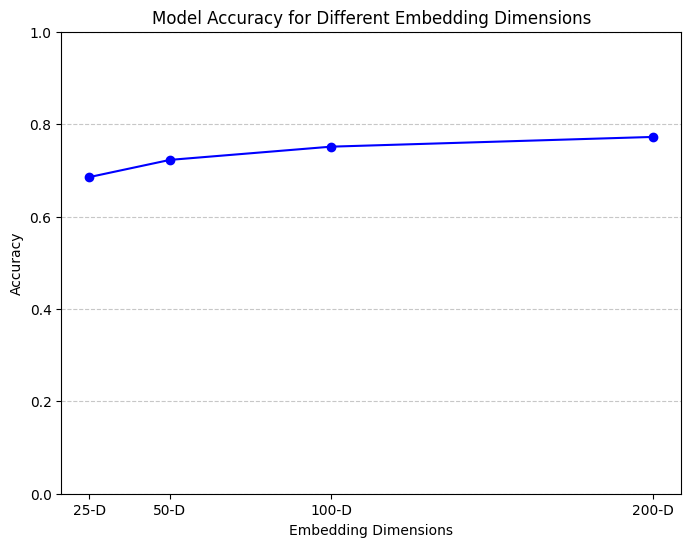

In [11]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize GloVe embedding matrices
embedding_matrices = {
    200: embedding_matrix_200,
    100: embedding_matrix_100,
    50: embedding_matrix_50,
    25: embedding_matrix_25
}

# Training parameters
alpha = 0.01  # Regularization parameter for SGD
max_iter = 1000
tol = 1e-3

# Store accuracies for plotting
accuracies = []

# Process each embedding matrix
for dim, embedding_matrix in embedding_matrices.items():
    print(f"\nTraining and evaluating model with {dim}-dimensional embeddings...")

    # Prepare training data
    train_labels, train_tokenized_tweets = zip(*train_data)
    X_train = get_batch_embeddings(train_tokenized_tweets, vocab, embedding_matrix)
    y_train = np.array(train_labels)

    # Normalize training data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)

    # Initialize and train classifier
    clf = SGDClassifier(loss="log_loss", max_iter=max_iter, tol=tol, alpha=alpha)
    print("Training model...")
    clf.fit(X_train, y_train)  # Fit the model directly on the entire dataset
    print(f"Training with {dim}-dimensional embeddings complete.")

    # Prepare test data
    test_labels, test_tokenized_tweets = zip(*test_data)
    X_test = get_batch_embeddings(test_tokenized_tweets, vocab, embedding_matrix)
    y_test = np.array(test_labels)

    # Normalize test data
    X_test = scaler.transform(X_test)

    # Predict and evaluate
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    accuracies.append((dim, accuracy))  # Store dimension and accuracy
    
    print(f"\nClassification Report for {dim}-dimensional embeddings:")
    print(classification_report(y_test, y_pred))

# Plotting the accuracies as a line plot
dims, scores = zip(*accuracies)  # Unpack dimensions and scores
plt.figure(figsize=(8, 6))
plt.plot(dims, scores, marker='o', linestyle='-', color='b')  # Line plot with markers

# Adding labels and grid
plt.title("Model Accuracy for Different Embedding Dimensions")
plt.xlabel("Embedding Dimensions")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Set y-axis limits between 0 and 1
plt.xticks(dims, [f"{d}-D" for d in dims])  # Properly label x-ticks
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


It can be concluded here that even with a higher embedding posing the risk of too much noise, its still contains more information (That is **relevant**). It is clear that in this case the higher embedding generates a better accuracy for this application

### Second Test: Include Stopwords or not ? 

In [61]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Use only the 200-dimensional embedding matrix
embedding_matrix = embedding_matrix_200

# Training parameters
alpha = 0.01  # Regularization parameter for SGD
max_iter = 1000
tol = 1e-3


print("\nTraining and evaluating model with 200-dimensional embeddings...")

# Prepare training data
train_labels, train_tokenized_tweets = zip(*train_data)
X_train = get_batch_embeddings(train_tokenized_tweets, vocab, embedding_matrix)
y_train = np.array(train_labels)

# Normalize training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Initialize and train classifier
clf = SGDClassifier(loss="log_loss", max_iter=max_iter, tol=tol, alpha=alpha)
print("Training model...")
clf.fit(X_train, y_train)  # Fit the model directly on the entire dataset
print("Training with 200-dimensional embeddings complete.")

# Prepare test data
test_labels, test_tokenized_tweets = zip(*test_data)
X_test = get_batch_embeddings(test_tokenized_tweets, vocab, embedding_matrix)
y_test = np.array(test_labels)

# Normalize test data
X_test = scaler.transform(X_test)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report for 200-dimensional embeddings:")
print(classification_report(y_test, y_pred))



Training and evaluating model with 200-dimensional embeddings...
Training model...
Training with 200-dimensional embeddings complete.

Classification Report for 200-dimensional embeddings:
              precision    recall  f1-score   support

           0       0.77      0.75      0.76      4982
           1       0.76      0.78      0.77      5018

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000



In [62]:
print("Processing tweets...")
final_tweets = process_tweets(subset_tweets, vocab,exclude_stopwords=True)
print(f"Processed {len(final_tweets)} embedded tweets.")

Processing tweets...
Skipping invalid tweet with label 0: ['of', 'who', 'and', 'why']
Skipping invalid tweet with label 1: ['so', 'now', 'you', 'no', 'who', 'i', 'am']
Skipping invalid tweet with label 0: ['i', 'do', 'not', 'have', 'it', 'if', 'we', 'did']
Skipping invalid tweet with label 1: ['just', 'won', 'this']
Skipping invalid tweet with label 0: ['with', 'me']
Skipping invalid tweet with label 0: ['why']
Skipping invalid tweet with label 1: ['cheerfully']
Skipping invalid tweet with label 0: ['it', 'is', 'over', 'now']
Skipping invalid tweet with label 1: ['can', 'i', 'have', 'what', 'you', 'do', 'not', 'have']
Skipping invalid tweet with label 1: ['with']
Skipping invalid tweet with label 0: ['that', 'is', 'not', 'you', 'again']
Skipping invalid tweet with label 1: ['and', 'hers']
Skipping invalid tweet with label 0: ['that', 'is', 'a', 'while']
Skipping invalid tweet with label 0: ['will', 'not', 'be', 'here']
Skipping invalid tweet with label 0: ['because', 'she', 'can']
Skip

In [63]:
# Split into train and test sets
test_size = 10000  # Adjust as needed
test_data = final_tweets[:test_size]  # First `test_size` entries for testing
train_data = final_tweets[test_size:]  # Remaining data for training


In [64]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Use only the 200-dimensional embedding matrix
embedding_matrix = embedding_matrix_200

# Training parameters
alpha = 0.01  # Regularization parameter for SGD
max_iter = 1000
tol = 1e-3


print("\nTraining and evaluating model with 200-dimensional embeddings...")

# Prepare training data
train_labels, train_tokenized_tweets = zip(*train_data)
X_train = get_batch_embeddings(train_tokenized_tweets, vocab, embedding_matrix)
y_train = np.array(train_labels)

# Normalize training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Initialize and train classifier
clf = SGDClassifier(loss="log_loss", max_iter=max_iter, tol=tol, alpha=alpha)
print("Training model...")
clf.fit(X_train, y_train)  # Fit the model directly on the entire dataset
print("Training with 200-dimensional embeddings complete.")

# Prepare test data
test_labels, test_tokenized_tweets = zip(*test_data)
X_test = get_batch_embeddings(test_tokenized_tweets, vocab, embedding_matrix)
y_test = np.array(test_labels)

# Normalize test data
X_test = scaler.transform(X_test)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report for 200-dimensional embeddings:")
print(classification_report(y_test, y_pred))



Training and evaluating model with 200-dimensional embeddings...
Training model...
Training with 200-dimensional embeddings complete.

Classification Report for 200-dimensional embeddings:
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      5118
           1       0.73      0.78      0.75      4882

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



By running this test multiple times it can be seen that the **excluding the stopwords** either yield a similar result or a worse one! This can be explained by the fact that some of the stopwords are inherently negative like "not". 
Therefore, it is concluded that we will include the stopwords in this case

### Third Test: Min Frequency Threshold? 

Building vocabularies and embedding matrices...
Loaded 1193514 word vectors from GloVe.
Building vocabulary and embedding matrix for threshold 1...
Embedding matrix shape for 'vocab_1': (195673, 200)
Building vocabulary and embedding matrix for threshold 2...
Embedding matrix shape for 'vocab_2': (195666, 200)
Building vocabulary and embedding matrix for threshold 4...
Embedding matrix shape for 'vocab_4': (191194, 200)
Building vocabulary and embedding matrix for threshold 6...
Embedding matrix shape for 'vocab_6': (184081, 200)
Building vocabulary and embedding matrix for threshold 8...
Embedding matrix shape for 'vocab_8': (160666, 200)
Building vocabulary and embedding matrix for threshold 12...
Embedding matrix shape for 'vocab_12': (136421, 200)
Building vocabulary and embedding matrix for threshold 17...
Embedding matrix shape for 'vocab_17': (136421, 200)
Building vocabulary and embedding matrix for threshold 25...
Embedding matrix shape for 'vocab_25': (86330, 200)
Building vo

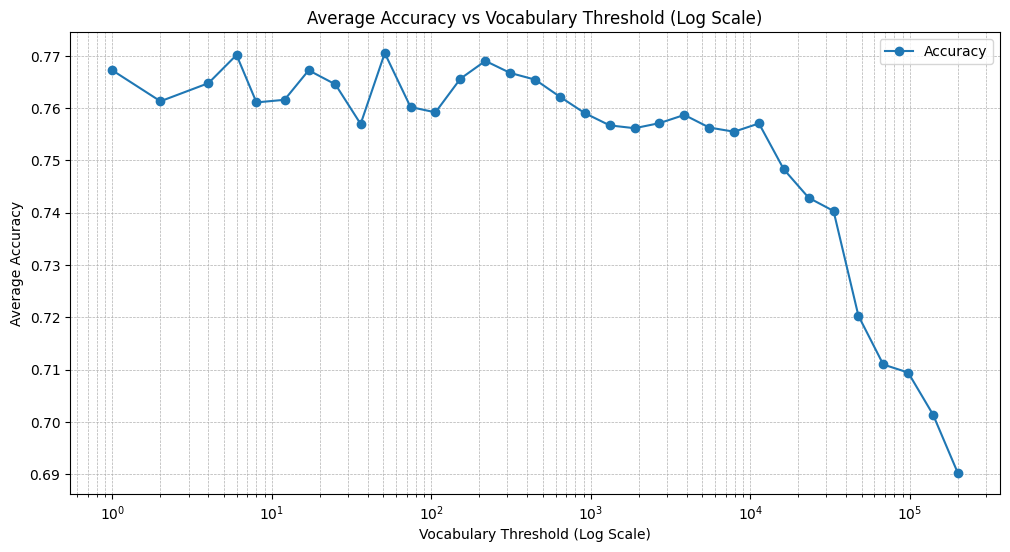

In [26]:
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import random
import matplotlib.pyplot as plt

# Initialize parameters
alpha = 0.01  # Regularization parameter for SGD
max_iter = 1000
tol = 1e-3
num_repeats = 10  # Number of times to repeat training/testing
test_size = 10000  # Number of test samples

# Generate thresholds on a logarithmic scale 
thresholds = np.logspace(np.log10(1), np.log10(200000), num=35, dtype=int)
thresholds = sorted(set(thresholds))  # Remove duplicates and sort
accuracy_scores = []  # To store average accuracies for each threshold

# Create vocabularies and corresponding embedding matrices
print("Building vocabularies and embedding matrices...")
vocabularies = {}
embedding_matrices = {}

# Assume `all_tweets` and `glove_embeddings` are predefined
glove_file = "glove.twitter.27B.200d.txt"
embedding_dim = 200
glove_embeddings = load_glove_embeddings(glove_file)

for t in thresholds:
    vocab_name = f"vocab_{t}"
    print(f"Building vocabulary and embedding matrix for threshold {t}...")

    # Build vocabulary for the threshold
    vocab = build_vocab(all_tweets, t)[0]
    vocabularies[vocab_name] = vocab

    # Create embedding matrix for the vocabulary
    embedding_matrix = map_vocab_to_glove(vocab, glove_embeddings, embedding_dim)
    embedding_matrices[vocab_name] = embedding_matrix
    print(f"Embedding matrix shape for '{vocab_name}': {embedding_matrix.shape}")

print("Finished building vocabularies and embedding matrices.")

# Preprocess tweets and split into train/test sets
print("Preprocessing tweets and creating train/test splits...")
train_test_splits = {}

for vocab_name, vocab in vocabularies.items():
    print(f"Processing tweets using vocabulary '{vocab_name}'...")
    preprocessed_tweets = process_tweets(subset_tweets, vocab, exclude_stopwords=False)
    print(f"Preprocessed {len(preprocessed_tweets)} tweets for '{vocab_name}'.")

    # Shuffle and create train/test splits
    random.shuffle(preprocessed_tweets)  # Shuffle dataset globally
    train_data = preprocessed_tweets[test_size:]  # Remaining data for training
    test_data = preprocessed_tweets[:test_size]  # First `test_size` entries for testing

    train_test_splits[vocab_name] = {"train": train_data, "test": test_data}

print("Finished preprocessing tweets and creating train/test splits.")

# Train and evaluate model for each vocabulary
print("Training and evaluating models...")
for t in thresholds:
    vocab_name = f"vocab_{t}"
    print(f"\nTraining and evaluating model with {vocab_name}...")

    # Load corresponding vocabulary, embedding matrix, and train/test data
    vocab = vocabularies[vocab_name]
    embedding_matrix = embedding_matrices[vocab_name]
    train_data = train_test_splits[vocab_name]["train"]
    test_data = train_test_splits[vocab_name]["test"]

    # Repeat training and evaluation `num_repeats` times
    accuracies = []
    for repeat in range(num_repeats):
        print(f"Run {repeat + 1} for {vocab_name}...")

        # Shuffle train and test data for randomness
        random.shuffle(train_data)
        random.shuffle(test_data)

        # Prepare training data
        train_labels, train_tokenized_tweets = zip(*train_data)
        X_train = get_batch_embeddings(train_tokenized_tweets, vocab, embedding_matrix)
        y_train = np.array(train_labels)

        # Normalize training data
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)

        # Initialize and train classifier
        clf = SGDClassifier(loss="log_loss", max_iter=max_iter, tol=tol, alpha=alpha)
        clf.fit(X_train, y_train)  # Fit the model directly on the entire dataset

        # Prepare test data
        test_labels, test_tokenized_tweets = zip(*test_data)
        X_test = get_batch_embeddings(test_tokenized_tweets, vocab, embedding_matrix)
        y_test = np.array(test_labels)

        # Normalize test data
        X_test = scaler.transform(X_test)

        # Predict and evaluate
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(accuracy)

    # Compute the average accuracy for this vocabulary
    avg_accuracy = np.mean(accuracies)
    accuracy_scores.append(avg_accuracy)
    print(f"Average accuracy for {vocab_name}: {avg_accuracy:.4f}")

# Plot accuracy vs. thresholds with log scale for thresholds
plt.figure(figsize=(12, 6))
plt.plot(thresholds, accuracy_scores, marker='o', label='Accuracy')
plt.xscale('log')  # Set x-axis to logarithmic scale
plt.title('Average Accuracy vs Vocabulary Threshold (Log Scale)')
plt.xlabel('Vocabulary Threshold (Log Scale)')
plt.ylabel('Average Accuracy')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Add grid lines for log scale
plt.legend()
plt.show()

This tests shows an intersting compromise between noise and information. The higher the threshold the less the information (lower accuracy), but the less the osciullations also. On the other hand, the lower the information the hoigher the accurcay but with significant oscillations. The sweetspot is around **300 words** which is what we chose for our model

### Fourth Test: HyperParamater Tuning 

In [65]:
print("Building vocabulary...")
vocab, word_counts = build_vocab(all_tweets, 300)  
print(f"Vocabulary size: {len(vocab)}")

Building vocabulary...
Vocabulary size: 5434


In [66]:

# Define the GloVe file and corresponding dimension
glove_file = "glove.twitter.27B.200d.txt"
embedding_dim = 200

# Process only the 200-dimensional GloVe embeddings
print(f"Processing GloVe embeddings for {embedding_dim} dimensions...")

# Load GloVe embeddings
glove_embeddings = load_glove_embeddings(glove_file)

# Map vocabulary to GloVe embeddings
embedding_matrix_200 = map_vocab_to_glove(vocab, glove_embeddings, embedding_dim)
print(f"Embedding matrix shape for {embedding_dim} dimensions: {embedding_matrix_200.shape}")

# Save embedding_matrix to file
output_embedding_file = f"embedding_matrix_glove_{embedding_dim}.npy"
np.save(output_embedding_file, embedding_matrix_200)
print(f"Saved embedding matrix to {output_embedding_file}")

print(f"Variable available for use: embedding_matrix_200")


Processing GloVe embeddings for 200 dimensions...
Loaded 1193514 word vectors from GloVe.
Embedding matrix shape for 200 dimensions: (24712, 200)
Saved embedding matrix to embedding_matrix_glove_200.npy
Variable available for use: embedding_matrix_200


In [67]:
print("Processing tweets...")
final_tweets = process_tweets(subset_tweets, vocab, exclude_stopwords=False)
print(f"Processed {len(final_tweets)} embedded tweets.")

Processing tweets...
Skipping invalid tweet with label 1: ['cheerfully']
Skipping invalid tweet with label 1: ['queensland']
Skipping invalid tweet with label 0: ['emotionally', 'raped']
Skipping invalid tweet with label 1: []
Skipping invalid tweet with label 0: ['thingsinmylifethatarepriceless']
Skipping invalid tweet with label 1: ['whohoho']
Skipping invalid tweet with label 0: ['sabina', 'almskeenaelly', 'btdawm']
Skipping invalid tweet with label 1: ['everylittlethingisgonnabealright']
Skipping invalid tweet with label 1: ['capitol']
Skipping invalid tweet with label 1: ['godmorning', 'tubby']
Skipping invalid tweet with label 1: ['racial']
Skipping invalid tweet with label 1: ['keystothecity']
Skipping invalid tweet with label 1: ['thankyouu']
Skipping invalid tweet with label 1: ['mythoughtsduringschool']
Skipping invalid tweet with label 0: ['soundslikeimissedoutbigtime']
Skipping invalid tweet with label 1: ['hilariousthatyouhashtageverything']
Skipping invalid tweet with lab

In [ ]:
from sklearn.model_selection import ParameterGrid, GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import random
import numpy as np

# Define test size and shuffle dataset globally
test_size = 10000  # Adjust as needed
random.shuffle(final_tweets)  # Shuffle the dataset
test_data = final_tweets[:test_size]  # Use the first `test_size` entries as test data
train_data = final_tweets[test_size:]  # Use the rest as training data

# Extract train and test labels and tokenized tweets
train_labels, train_tokenized_tweets = zip(*train_data)
test_labels, test_tokenized_tweets = zip(*test_data)

# Generate embeddings for training and test data
X_train = get_batch_embeddings(train_tokenized_tweets, vocab, embedding_matrix_200)
X_test = get_batch_embeddings(test_tokenized_tweets, vocab, embedding_matrix_200)
y_train = np.array(train_labels)
y_test = np.array(test_labels)

# Normalize the embeddings
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the hyperparameter grid
param_grid = {
    "alpha": [1e-4, 1e-3, 1e-2, 1e-1],
    "loss": ["log_loss", "hinge"],
    "penalty": ["l2", "l1", None],
    "eta0": [0.0001, 0.001, 0.01, 0.1],
    "max_iter": [1000, 3000, 5000, 10000],
    "tol": [1e-4, 1e-3, 1e-2],  # Adding tol to the grid
}


# Generate all combinations of parameters
param_combinations = list(ParameterGrid(param_grid))
print(f"Number of combinations: {len(param_combinations)}")

# Initialize the classifier
clf = SGDClassifier()

# Perform Grid Search on training data
grid_search = GridSearchCV(clf, param_grid, scoring="accuracy", cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Output best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation score: {grid_search.best_score_}")

# Train the model with the best parameters on the full training set
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test accuracy with best parameters: {test_accuracy:.4f}")


Number of combinations: 1152


/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project2/CS-433-ML-Project2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project2/CS-433-ML-Project2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/selim_sherif/Documents/EPFL/MA1/CS-433_Machine-Learning/projects/project2/CS-433-ML-Project2/.venv/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/home/selim_sherif/Doc

Best parameters: {'alpha': 0.001, 'eta0': 0.01, 'loss': 'hinge', 'max_iter': 3000, 'penalty': 'l2', 'tol': 0.0001}
Best cross-validation score: 0.7654374499866631
Test accuracy with best parameters: 0.7707


In [85]:
# Extract top 5 parameter combinations based on cross-validation score
cv_results = grid_search.cv_results_
sorted_indices = np.argsort(cv_results['mean_test_score'])[::-1]  # Sort by descending mean_test_score
top_5_indices = sorted_indices[:5]

print("\nTop 5 parameter combinations and their scores:")
for rank, idx in enumerate(top_5_indices, start=1):
    params = cv_results['params'][idx]
    mean_score = cv_results['mean_test_score'][idx]
    std_score = cv_results['std_test_score'][idx]
    print(f"Rank {rank}:")
    print(f"  Parameters: {params}")
    print(f"  Mean CV Score: {mean_score:.4f} (± {std_score:.4f})")



Top 5 parameter combinations and their scores:
Rank 1:
  Parameters: {'alpha': 0.001, 'eta0': 0.01, 'loss': 'hinge', 'max_iter': 3000, 'penalty': 'l2', 'tol': 0.0001}
  Mean CV Score: 0.7654 (± 0.0040)
Rank 2:
  Parameters: {'alpha': 0.01, 'eta0': 0.001, 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l2', 'tol': 0.0001}
  Mean CV Score: 0.7654 (± 0.0048)
Rank 3:
  Parameters: {'alpha': 0.01, 'eta0': 0.001, 'loss': 'hinge', 'max_iter': 10000, 'penalty': 'l2', 'tol': 0.0001}
  Mean CV Score: 0.7654 (± 0.0048)
Rank 4:
  Parameters: {'alpha': 0.01, 'eta0': 0.1, 'loss': 'hinge', 'max_iter': 5000, 'penalty': 'l2', 'tol': 0.0001}
  Mean CV Score: 0.7654 (± 0.0053)
Rank 5:
  Parameters: {'alpha': 0.01, 'eta0': 0.001, 'loss': 'hinge', 'max_iter': 3000, 'penalty': 'l2', 'tol': 0.0001}
  Mean CV Score: 0.7652 (± 0.0044)


In [89]:
# Define test size and shuffle dataset globally
test_size = 10000  # Adjust as needed
random.shuffle(final_tweets)  # Shuffle the dataset
test_data = final_tweets[:test_size]  # Use the first `test_size` entries as test data
train_data = final_tweets[test_size:]  # Use the rest as training data

The HP tuning grid showed use the follwoing information:
- The hinge (SVM-Like) model performs better than the logistic regression on average
- The optimal alpha is between **0.01 and 0.001**
- The optimal penalty technique used is the **l2-norm poenalization**
- The eta0 paramater appears to have no significant influence on the model

### Final Model

In [92]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import numpy as np

# Use the 200-dimensional embedding matrix
embedding_matrix = embedding_matrix_200

# Training parameters
alpha = 0.01  # Regularization parameter for SGD
max_iter = 10000
eta0 = 0.001
penalty = "l2"
loss = "hinge"
tol =1e-4

print("\nTraining and evaluating model with 200-dimensional embeddings...")

# Prepare training data
train_labels, train_tokenized_tweets = zip(*train_data)
X_train = get_batch_embeddings(train_tokenized_tweets, vocab, embedding_matrix)
y_train = np.array(train_labels)

# Normalize training data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

# Initialize and train classifier
clf = SGDClassifier(loss=loss, max_iter=max_iter, alpha=alpha, tol=tol ,penalty=penalty, learning_rate="constant", eta0=eta0)
print("Training model...")
clf.fit(X_train, y_train)  # Fit the model directly on the entire dataset
print("Training with 200-dimensional embeddings complete.")

# Prepare test data
test_labels, test_tokenized_tweets = zip(*test_data)
X_test = get_batch_embeddings(test_tokenized_tweets, vocab, embedding_matrix)
y_test = np.array(test_labels)

# Normalize test data
X_test = scaler.transform(X_test)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("\nClassification Report for 200-dimensional embeddings:")
print(classification_report(y_test, y_pred))



Training and evaluating model with 200-dimensional embeddings...
Training model...
Training with 200-dimensional embeddings complete.

Classification Report for 200-dimensional embeddings:
              precision    recall  f1-score   support

           0       0.77      0.74      0.76      5059
           1       0.75      0.78      0.76      4941

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.76     10000
weighted avg       0.76      0.76      0.76     10000

